In [4]:
import sys
import numpy as np
import scipy
import scipy.sparse as SP
import scipy.optimize as spopt
from solver.ode_layer import ODEINDLayer
import matplotlib.pyplot as plt
import torch
import torch.optim as optim
from matplotlib.animation import FuncAnimation

Solving $ u'' + u = 0$, given $u(0) = 0$, $u'(0) = 1$.

In [5]:
step_size = 0.05
end = 500*step_size
n_step = int(end/step_size)
order=2

steps = step_size*np.ones((n_step-1,))
steps = torch.tensor(steps)

In [6]:
#coeffs are c_2 = 1, c_1 = 0, c_0 = 0
_coeffs = np.array([[1,0,1]], dtype='float32')
_coeffs = np.repeat(_coeffs, n_step, axis=0)
_coeffs = torch.tensor(_coeffs)

_rhs = torch.tensor(0.)
rhs = _rhs.repeat(n_step)

# initial values at time t=0. 
iv = torch.tensor([0,1], dtype=torch.float32)

In [7]:
coeffs = _coeffs.reshape(1, n_step, order+1)
rhs = rhs.unsqueeze(0)
iv = iv.unsqueeze(0)

In [16]:
ode = ODEINDLayer(bs=1,order=order,n_ind_dim=1,n_iv=2,n_step=n_step,n_iv_steps=1)

Using double precision solver


In [17]:
u0,u1,u2,eps,_ = ode(_coeffs, rhs, iv, steps)

Plot $u,u',u''$

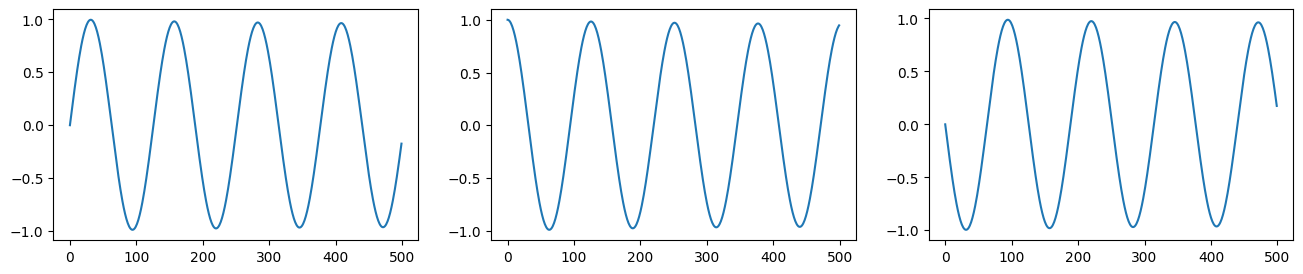

In [18]:
f, axis = plt.subplots(1,3, figsize=(16,3))
axis[0].plot(u0.squeeze())
axis[1].plot(u1.squeeze())
axis[2].plot(u2.squeeze())

**Test SciPy**

In [11]:
from scipy.integrate import odeint

$u'' + u = 0$ transforms to $u'=x$, $x'=-u$

In [12]:
def model(z, t):
    return [z[1], -z[0]]

In [13]:
time = np.arange(0, step_size*n_step, step_size)

In [14]:
z, zp = odeint(model, [0,1], time).T

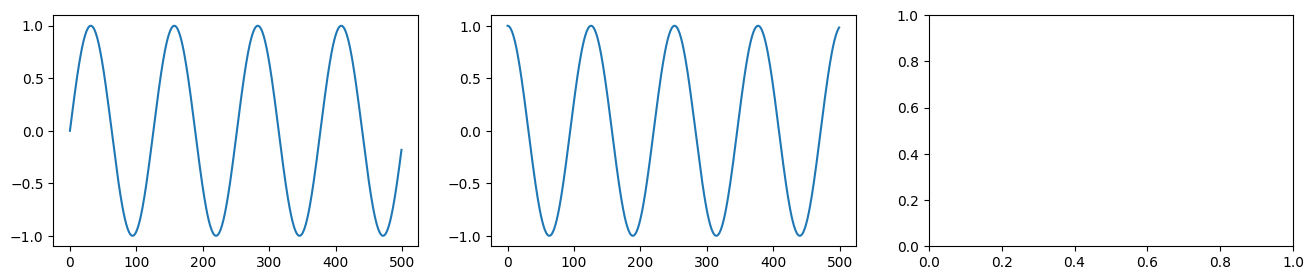

In [15]:
f, axis = plt.subplots(1,3, figsize=(16,3))
axis[0].plot(z.squeeze())
axis[1].plot(zp.squeeze())